# **Classical vs Quantum Bits**

Classical computer bits operate in binary, meaning they are either 0 or 1 at any given time. However, in quantum computing, a qubit can exist in a combined state of both 0 and 1. It only settles into a specific value of either 0 or 1 when measured (the superposition).

In quantum mechanics, states are typically represented as vectors. For instance, we can denote the state representing 0 as $\ket{0}$ and the state representing 1 as $\ket{1}$. A qubit can be in a superposition of these states, which can be represented as $\alpha\ket{0} + \beta\ket{1}$, where $\alpha$ and $\beta$ are complex numbers. The probability of measuring the qubit in state $\ket{0}$ is $|\alpha|^2$ and the probability of measuring the qubit in state $\ket{1}$ is $|\beta|^2$. The normalization condition requires that $|\alpha|^2 + |\beta|^2 = 1$.

```{admonition} Classical vs Quantum Bits Refresher
:class: tip, dropdown

### Classical Bits:
In a classical computer, information is stored in bits. A bit can be in one of two states: 0 or 1. Think of it like a light switch that can either be off (0) or on (1). Each bit is always in one of these two states at any given time.

### Quantum Bits (Qubits):
Qubits are the basic unit of quantum information. Unlike classical bits, qubits can be in a state that is a combination of both 0 and 1 at the same time. This is known as a superposition. Imagine a spinning coin that can be both heads and tails until you look at it.
```

```{admonition} Quantum Superposition, Entanglement and Inteference Refresher
:class: tip, dropdown

### Quantum Superposition:
A qubit can exist in a superposition of states. This means that it can be in a combination of both 0 and 1 at the same time. When you measure a qubit, it collapses to one of the two states.

### Quantum Entanglement:
Entanglement is a phenomenon where two or more qubits become correlated with each other in such a way that the state of one qubit cannot be described independently of the state of the others. This means that the state of one qubit can depend on the state of another, no matter how far apart they are.

### Quantum Interference:
Quantum interference is a phenomenon where the probability of measuring a certain state of a qubit is affected by the presence of other qubits. This can lead to constructive or destructive interference, where the probability of measuring a certain state is increased or decreased.
```

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, assemble, result
from qiskit_aer import StatevectorSimulator, AerSimulator, QasmSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit.compiler import transpile


## Bra-ket Notation and Vector Spaces

Before we start, let’s go over what bra-ket notation is.

In quantum mechanics, the state of a quantum system is expressed using the “ket” notation: $|\psi\rangle$. This notation stems from the theory of vector spaces. Each quantum state is a vector in a **Hilbert space** (a vector space equipped with an inner product that induces a distance function). The “bra” notation, $\langle\psi|$, represents the conjugate transpose (also known as the adjoint) of the “ket” notation. When you combine these, it allows us to compute the inner products between quantum states.

```{admonition} Explanation
:class: tip, dropdown

**Ket Notation:**

In quantum mechanics, we often describe the state of a system using "ket" notation, written as $|\psi\rangle$. You can think of this as a way to label or name the state of the system. It's like saying "this is the state called $\psi$".

**Hilbert Space:**

The state $|\psi\rangle$ is not just a label; it represents a vector in a special kind of mathematical space called a **Hilbert space**. This is a space where each point corresponds to a possible state of the quantum system. It's similar to how each point in a regular 3D space corresponds to a location in that space, but Hilbert spaces can have many more dimensions.

**Bra Notation:**

The "bra" notation, written as $\langle\psi|$, is closely related to the ket notation. It represents the conjugate transpose of the ket. If $|\psi\rangle$ is like a column vector, then $\langle\psi|$ is like a row vector that you get by flipping the column vector and taking the complex conjugate of each element.

**Inner Products:**

When you combine a bra and a ket, such as $\langle\phi|\psi\rangle$, you are computing what is called an inner product. This inner product is a way of measuring how similar or "aligned" two quantum states are. If the inner product is zero, it means the states are orthogonal, or completely different in a quantum sense. If it's one, the states are identical.
```
```{admonition} Example
:class: note

Imagine you have two states, $|\psi\rangle$ and $|\phi\rangle$. The inner product $\langle\phi|\psi\rangle$ gives a complex number that tells you something about the relationship between these two states. This is crucial for many calculations in quantum mechanics, such as finding probabilities and understanding quantum interference.
```


## Measuring a Qubit State

When you measure a qubit, it collapses to one of the two states: 0 or 1. The probability of measuring a qubit in state $\ket{0}$ is $|\alpha|^2$ and the probability of measuring a qubit in state $\ket{1}$ is $|\beta|^2$. The normalization condition requires that $|\alpha|^2 + |\beta|^2 = 1$.

```{prf:algorithm} Calculating Measurement of Probability in Quantum Mechanics
:label: alg-measurement

**Input:**
* Quantum state $|\psi\rangle$, represented as a vector in a **Hilbert space**.
* Measurement basis state $|x\rangle$, against which the quantum state $|\psi\rangle$ will be measured.

**Objective:** Calculate the probability $p(x)$ of observing the system in the state $|x\rangle$ when measured.

**Procedure:**
1. Compute the inner product of the vector $|x\rangle$, which represents the amplitude of the state $|\psi\rangle$ in the direction of $|x\rangle$.
2. Calculate the modulus squared of the inner product, $|\langle x|\psi\rangle|^2$, to obtain the probability $p(x)$. This step applies the **Born rule**, which posits that the probability of observing a particular outcome in a quantum measurement is given by the square of the amplitude of the quantum state in the direction of the measurement outcome.

**Output:** The probability $p(x) = |\langle x|\psi\rangle|^2$ of the quantum state $|\psi\rangle$ collapsing to the state $|x\rangle$ upon measurement.
```

### Explanation

This algorithm explains how to calculate the probability of measuring a quantum state in a particular basis state. In quantum mechanics, the state of a system is described by a vector in a Hilbert space. When we measure the state, it collapses to one of the basis states with a probability given by the modulus squared of the inner product between the state vector and the basis vector. The Born rule is used to calculate this probability.

```{admonition} Simpler Explanation
:class: tip, dropdown

In simpler terms, this algorithm tells us how to find out the chances of a quantum system being in a specific state when we measure it. Imagine you have a system that can be in multiple states, and you want to know how likely it is to find it in a particular state. This is done by calculating how much the system "aligns" with the state you're interested in and then squaring this value to get the probability.
```


```{prf:algorithm} Example: Calculating Measurement Probability
:label: alg-example

**Given Quantum State:** $|q_0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle$ superposition state in the computational basis.

**Objective:** Determine the probability of measuring the state $|0\rangle$ in the given quantum state $|q_0\rangle$.

**Step 1:** Calculate the inner product $\langle 0|q_0\rangle$ to find the amplitude of $|0\rangle$ in $|q_0\rangle$.

*Inner product calculation:*

$$
\langle 0|q_0\rangle = \frac{1}{\sqrt{2}}\langle 0|0\rangle + \frac{i}{\sqrt{2}}\langle 0|1\rangle
$$

*Expanding using the given state.*

**Recall:** Orthogonality of basis states implies $\langle 0|1\rangle = 0$ and $\langle 0|0\rangle = 1$.
Thus,

$$
\langle 0|q_0\rangle = \frac{1}{\sqrt{2}}.
$$

**Step 2:** Calculate the probability of measuring $|0\rangle$ by squaring the magnitude of the amplitude.
*Probability calculation:*

$$
p(0) = |\langle 0|q_0\rangle|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}.
$$

**Conclusion:** The probability of measuring the state $|0\rangle$ in the quantum state $|q_0\rangle$ is $0.5$ or 50\%.
```

### Explanation

This example illustrates how to calculate the probability of measuring a specific state for a given quantum state. We start with a quantum state in superposition and use the inner product to find the amplitude of the basis state we are interested in. We then square the magnitude of this amplitude to get the probability of measuring the state. In this case, the state $|q_0\rangle$ is a superposition of $|0\rangle$ and $|1\rangle$, and we calculate the probability of measuring $|0\rangle$.

``` {admonition} Simpler Explanation
:class: tip, dropdown

Imagine you have a special coin that can be in both heads and tails at the same time (superposition). You want to find out how likely it is to get heads when you flip this coin. To do this, you check how much of the coin's state is in "heads" and then square this value to get the probability. In this example, the coin has equal chances of being heads or tails, so the probability of getting heads is 50%.
```

In [3]:
qc = QuantumCircuit(1)
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.save_statevector()
qc.draw()

┌─────────────────┐ statevector 
q: ┤ Initialize(0,1) ├──────░──────
   └─────────────────┘      ░

In [5]:
qc.measure_all()
qc.draw()

┌─────────────────┐ statevector  ░ ┌─┐
     q: ┤ Initialize(0,1) ├──────░───────░─┤M├
        └─────────────────┘      ░       ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

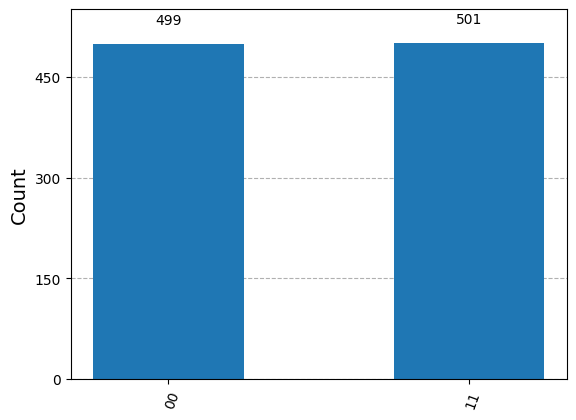

In [32]:
backend = Aer.get_backend('qasm_simulator')

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw('mpl')

job = backend.run(qc, shots=1000)

result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)